In [421]:
import pandas as pd
import seaborn as sns
import numpy as np
import statsmodels.api as sm

In [423]:
df=pd.read_csv("newdata copy.csv")
df['last_scraped']=pd.to_datetime(df['last_scraped'],errors='coerce')
df = df[(df['last_scraped'].dt.year == 2020) & (df['last_scraped'].dt.month == 5)]
df

/var/folders/pm/0d3_jsvj3gx0q5zw1jn_1d1h0000gn/T/ipykernel_77278/3401582608.py:1: DtypeWarning: Columns (1,2,4,7,8,10,12,13,14,15,17,18,36,40,41,42,43,44,45,46,47,49,52,54,55,56,57,59,60,61,62,63,64,65,66,67,68,72,73,75,85,87,89,90,91,94,95,96,97,109) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("newdata copy.csv")


,Unnamed: 0,X,id,listing_url,scrape_id,last_scraped,name,summary,space,description,...,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,number_of_reviews_ltm,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,number_of_reviews_l30d,bathrooms_text
115164,115165,0,109,https://www.airbnb.com/rooms/109,20200508043406,2020-05-09,Amazing bright elegant condo park front *UPGRA...,"*** Unit upgraded with new bamboo flooring, br...","*** Unit upgraded with new bamboo flooring, br...","*** Unit upgraded with new bamboo flooring, br...",...,730.0,730.0,30.0,730.0,0.0,1.0,0.0,0.0,NaN,NaN
115165,115166,1,344,https://www.airbnb.com/rooms/344,20200508043406,2020-05-08,Family perfect;Pool;Near Studios!,This home is perfect for families; aspiring ch...,"Cheerful & comfortable; near studios, amusemen...",This home is perfect for families; aspiring ch...,...,14.0,14.0,2.0,14.0,2.0,1.0,0.0,0.0,NaN,NaN
115166,115167,2,2708,https://www.airbnb.com/rooms/2708,20200508043406,2020-05-09,Mirrored Mini-Suite with Fireplace - W. Hollywood,Our best memory foam pillows you'll ever sleep...,Flickering fireplace. Blendtec® Designer 625 ...,Our best memory foam pillows you'll ever sleep...,...,1125.0,1125.0,29.5,1125.0,6.0,0.0,2.0,0.0,NaN,NaN
115167,115168,3,2732,https://www.airbnb.com/rooms/2732,20200508043406,2020-05-09,Zen Life at the Beach,NaN,This is a beautiful three story townhouse that...,This is a beautiful three story townhouse that...,...,180.0,180.0,1.0,180.0,3.0,1.0,1.0,0.0,NaN,NaN
115168,115169,4,2864,https://www.airbnb.com/rooms/2864,20200508043406,2020-05-09,* Beautiful Master Suite/Jacuzzi Tub/*,Centrally located.... Furnished with King Size...,Safe living on a cul de sac in newer neighborh...,Centrally located.... Furnished with King Size...,...,1125.0,1125.0,14.0,1125.0,0.0,1.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152208,152209,37043,43381911,https://www.airbnb.com/rooms/43381911,20200508043406,2020-05-09,NEW! Oceanside Pet Friendly Villa in Hamilton ...,Let your worries drift away on an ocean breeze...,Covered Balcony | Walk to Beach | Pet Friendly...,Let your worries drift away on an ocean breeze...,...,1125.0,1125.0,2.2,1125.0,0.0,20.0,0.0,0.0,NaN,NaN
152209,152210,37044,43382374,https://www.airbnb.com/rooms/43382374,20200508043406,2020-05-09,2 bedrooms Town home with balcony and 1 parking,A charming and cozy 2 bed 1.5 bath Town home o...,The house comes with 1 Parking spot located in...,A charming and cozy 2 bed 1.5 bath Town home o...,...,370.0,370.0,31.0,370.0,0.0,44.0,0.0,0.0,NaN,NaN
152210,152211,37045,43383605,https://www.airbnb.com/rooms/43383605,20200508043406,2020-05-09,"Private, clean room right in the heart of LA",Private room in 4 bedroom 2 bath apartment. Se...,"There are two bathrooms per four room unit, an...",Private room in 4 bedroom 2 bath apartment. Se...,...,28.0,28.0,2.0,28.0,0.0,0.0,24.0,0.0,NaN,NaN
152211,152212,37046,43383739,https://www.airbnb.com/rooms/43383739,20200508043406,2020-05-09,"A good clean space, your best deal in Los Angeles","Great deal! Your own private room, with lockin...",Private room in 4 bedroom 2 bath apartment. Se...,"Great deal! Your own private room, with lockin...",...,1125.0,1125.0,2.0,1125.0,0.0,0.0,24.0,0.0,NaN,NaN


In [292]:
data = df[['host_identity_verified','host_response_rate', 'host_is_superhost', 'price', 'security_deposit', 'cleaning_fee', 
'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights', 'review_scores_rating','reviews_per_month']]
data = data.dropna()

In [293]:
data

,host_identity_verified,host_response_rate,host_is_superhost,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,review_scores_rating,reviews_per_month
115164,t,100%,f,$122.00,$500.00,$240.00,3.0,$25.00,30.0,730.0,80.0,0.02
115165,t,60%,f,$168.00,$0.00,$100.00,6.0,$0.00,2.0,14.0,97.0,0.17
115166,t,100%,t,$79.00,$450.00,$84.00,1.0,$0.00,30.0,366.0,97.0,0.33
115169,t,57%,f,$145.00,$250.00,$60.00,1.0,$9.00,3.0,730.0,81.0,0.28
115170,f,100%,t,$75.00,$100.00,$25.00,1.0,$15.00,30.0,1125.0,96.0,2.35
...,...,...,...,...,...,...,...,...,...,...,...,...
151990,f,100%,t,$199.00,$750.00,$169.00,3.0,$10.00,1.0,1125.0,100.0,1.00
152060,f,100%,f,$177.00,$250.00,$150.00,4.0,$10.00,1.0,1125.0,100.0,1.00
152081,t,91%,f,$225.00,$0.00,$80.00,6.0,$30.00,3.0,1125.0,100.0,1.00
152134,f,100%,t,$109.00,$750.00,$89.00,1.0,$10.00,1.0,1125.0,100.0,1.00


In [294]:
data0 = pd.get_dummies(data,columns=['host_identity_verified','host_is_superhost'],drop_first=True)
data0[['price','security_deposit','cleaning_fee','extra_people']]=data0[['price','security_deposit','cleaning_fee','extra_people']].replace({'\$': '','\,': ''}, regex=True)
data0["host_response_rate"] = df["host_response_rate"].str.rstrip("%").astype("float") / 100
data0 = data0.apply(pd.to_numeric)

In [295]:
data0

,host_response_rate,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,review_scores_rating,reviews_per_month,host_identity_verified_t,host_is_superhost_t
115164,1.00,122.0,500.0,240.0,3.0,25.0,30.0,730.0,80.0,0.02,1,0
115165,0.60,168.0,0.0,100.0,6.0,0.0,2.0,14.0,97.0,0.17,1,0
115166,1.00,79.0,450.0,84.0,1.0,0.0,30.0,366.0,97.0,0.33,1,1
115169,0.57,145.0,250.0,60.0,1.0,9.0,3.0,730.0,81.0,0.28,1,0
115170,1.00,75.0,100.0,25.0,1.0,15.0,30.0,1125.0,96.0,2.35,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
151990,1.00,199.0,750.0,169.0,3.0,10.0,1.0,1125.0,100.0,1.00,0,1
152060,1.00,177.0,250.0,150.0,4.0,10.0,1.0,1125.0,100.0,1.00,0,0
152081,0.91,225.0,0.0,80.0,6.0,30.0,3.0,1125.0,100.0,1.00,1,0
152134,1.00,109.0,750.0,89.0,1.0,10.0,1.0,1125.0,100.0,1.00,0,1


In [76]:
data0['price'].describe()

count    19457.000000
mean       188.361207
std        346.364579
min          0.000000
25%         75.000000
50%        119.000000
75%        195.000000
max      10000.000000
Name: price, dtype: float64

In [297]:
p_low = data0["price"].quantile(0.01)
p_hi  = data0["price"].quantile(0.99)
data_ols = data0[(data0["price"] < p_hi) & (data0["price"] > p_low)]

<AxesSubplot:xlabel='price', ylabel='Count'>

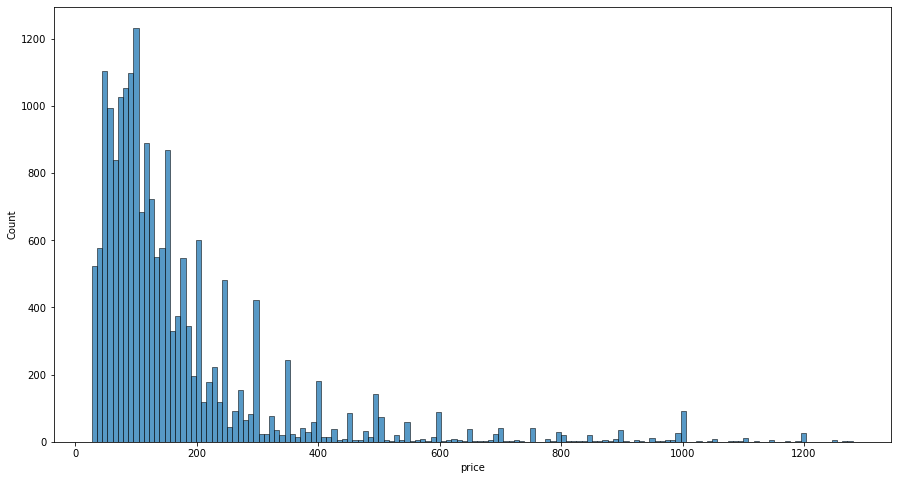

In [298]:
sns.histplot(data_ols['price'])

In [299]:
data_ols['price'] = np.log(data_ols['price'])

/var/folders/pm/0d3_jsvj3gx0q5zw1jn_1d1h0000gn/T/ipykernel_77278/1475295365.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_ols['price'] = np.log(data_ols['price'])


<AxesSubplot:xlabel='price', ylabel='Count'>

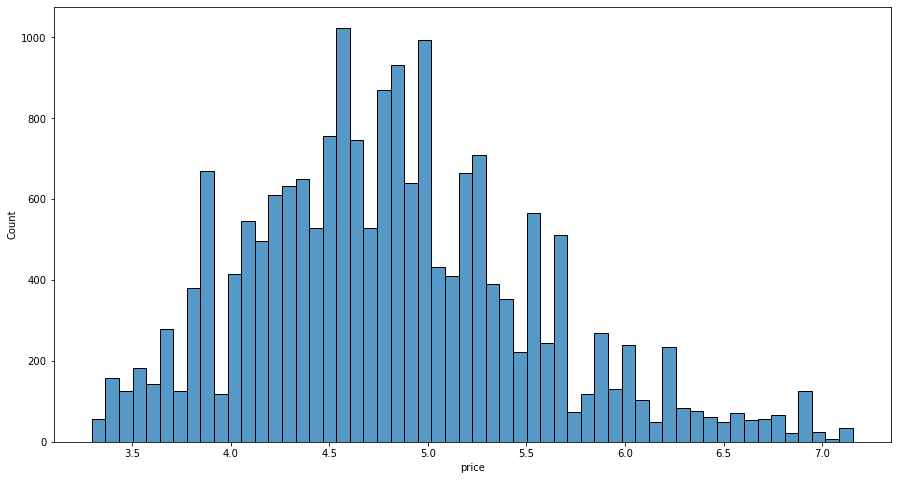

In [300]:
sns.histplot(data_ols['price'])

In [301]:
m_hi  = data_ols["minimum_nights"].quantile(0.99)
data_ols = data_ols[(data_ols["minimum_nights"] < m_hi)]

<AxesSubplot:xlabel='minimum_nights', ylabel='Count'>

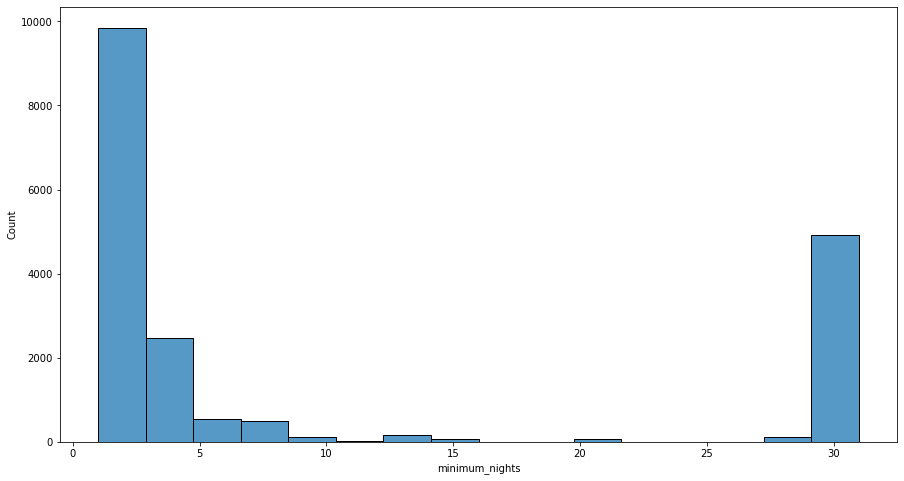

In [302]:
sns.histplot(data_ols['minimum_nights'])

In [303]:
data_ols['cleaning_fee'] = np.log(data_ols['cleaning_fee']+1)
data_ols['security_deposit'] = np.log(data_ols['security_deposit']+1)

In [304]:
data_ols

,host_response_rate,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,review_scores_rating,reviews_per_month,host_identity_verified_t,host_is_superhost_t
115164,1.00,4.804021,6.216606,5.484797,3.0,25.0,30.0,730.0,80.0,0.02,1,0
115165,0.60,5.123964,0.000000,4.615121,6.0,0.0,2.0,14.0,97.0,0.17,1,0
115166,1.00,4.369448,6.111467,4.442651,1.0,0.0,30.0,366.0,97.0,0.33,1,1
115169,0.57,4.976734,5.525453,4.110874,1.0,9.0,3.0,730.0,81.0,0.28,1,0
115170,1.00,4.317488,4.615121,3.258097,1.0,15.0,30.0,1125.0,96.0,2.35,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
151990,1.00,5.293305,6.621406,5.135798,3.0,10.0,1.0,1125.0,100.0,1.00,0,1
152060,1.00,5.176150,5.525453,5.017280,4.0,10.0,1.0,1125.0,100.0,1.00,0,0
152081,0.91,5.416100,0.000000,4.394449,6.0,30.0,3.0,1125.0,100.0,1.00,1,0
152134,1.00,4.691348,6.621406,4.499810,1.0,10.0,1.0,1125.0,100.0,1.00,0,1


In [305]:
data_ols.corr()

,host_response_rate,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,review_scores_rating,reviews_per_month,host_identity_verified_t,host_is_superhost_t
host_response_rate,1.000000,-0.008193,0.034172,0.027052,0.004250,-0.005551,-0.037905,-0.019652,0.118118,0.115955,0.038545,0.204261
price,-0.008193,1.000000,0.266536,0.549906,0.465587,0.166211,-0.018052,0.112728,0.039626,-0.092828,0.029098,0.020272
security_deposit,0.034172,0.266536,1.000000,0.344756,0.188199,0.140560,0.154629,0.039898,0.091274,-0.122828,0.074360,0.077226
cleaning_fee,0.027052,0.549906,0.344756,1.000000,0.306297,0.105494,0.188967,0.135893,0.038650,-0.170885,0.056178,0.030465
guests_included,0.004250,0.465587,0.188199,0.306297,1.000000,0.324191,-0.062837,0.036091,-0.009682,0.010833,-0.024058,-0.007535
extra_people,-0.005551,0.166211,0.140560,0.105494,0.324191,1.000000,-0.044180,-0.036800,0.024259,-0.040677,0.006823,0.008001
minimum_nights,-0.037905,-0.018052,0.154629,0.188967,-0.062837,-0.044180,1.000000,0.146594,-0.004047,-0.250610,0.082778,-0.022178
maximum_nights,-0.019652,0.112728,0.039898,0.135893,0.036091,-0.036800,0.146594,1.000000,-0.080641,-0.140838,-0.011746,-0.111499
review_scores_rating,0.118118,0.039626,0.091274,0.038650,-0.009682,0.024259,-0.004047,-0.080641,1.000000,0.109158,0.060257,0.355744
reviews_per_month,0.115955,-0.092828,-0.122828,-0.170885,0.010833,-0.040677,-0.250610,-0.140838,0.109158,1.000000,-0.019644,0.234432


In [414]:
x = data_ols.drop(['review_scores_rating','maximum_nights'],axis=1)
sm.OLS(data_ols['review_scores_rating'],sm.add_constant(x)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     review_scores_rating   R-squared:                       0.137
Model:                              OLS   Adj. R-squared:                  0.136
Method:                   Least Squares   F-statistic:                     298.1
Date:                  Tue, 21 Feb 2023   Prob (F-statistic):               0.00
Time:                          23:22:13   Log-Likelihood:                -65205.
No. Observations:                 18852   AIC:                         1.304e+05
Df Residuals:                     18841   BIC:                         1.305e+05
Df Model:                            10                                         
Covariance Type:              nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       86.4756      0.563    153.601      0.000      85.372      87.579
host_response_rate           2.5307      0.405      6.250      0.000       1.737       3.324
price                        0.3937      0.101      3.882      0.000       0.195       0.592
security_deposit             0.1842      0.022      8.328      0.000       0.141       0.228
cleaning_fee                 0.0214      0.061      0.353      0.724      -0.098       0.140
guests_included             -0.1873      0.035     -5.314      0.000      -0.256      -0.118
extra_people                 0.0070      0.002      3.135      0.002       0.003       0.011
minimum_nights               0.0009      0.005      0.188      0.851      -0.009       0.010
reviews_per_month            0.1871      0.034      5.521      0.000       0.121       0.254
host_identity_verified_t     0.5090      0.114      4.471      0.000       0.286       0.732
host_is_superhost_t          5.4606      0.118     46.084      0.000       5.228       5.693
==============================================================================
Omnibus:                    16688.461   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           727211.842
Skew:                          -4.156   Prob(JB):                         0.00
Kurtosis:                      32.270   Cond. No.                         378.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [323]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split 
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

In [405]:
data0

,host_response_rate,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,review_scores_rating,reviews_per_month,host_identity_verified_t,host_is_superhost_t
115164,1.00,122.0,500.0,240.0,3.0,25.0,30.0,730.0,80.0,0.02,1,0
115165,0.60,168.0,0.0,100.0,6.0,0.0,2.0,14.0,97.0,0.17,1,0
115166,1.00,79.0,450.0,84.0,1.0,0.0,30.0,366.0,97.0,0.33,1,1
115169,0.57,145.0,250.0,60.0,1.0,9.0,3.0,730.0,81.0,0.28,1,0
115170,1.00,75.0,100.0,25.0,1.0,15.0,30.0,1125.0,96.0,2.35,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
151990,1.00,199.0,750.0,169.0,3.0,10.0,1.0,1125.0,100.0,1.00,0,1
152060,1.00,177.0,250.0,150.0,4.0,10.0,1.0,1125.0,100.0,1.00,0,0
152081,0.91,225.0,0.0,80.0,6.0,30.0,3.0,1125.0,100.0,1.00,1,0
152134,1.00,109.0,750.0,89.0,1.0,10.0,1.0,1125.0,100.0,1.00,0,1


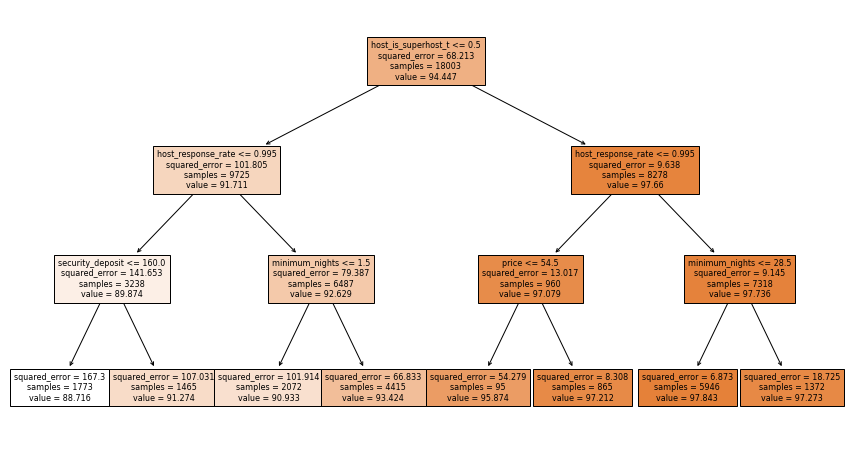

In [415]:
m_hi  = data0["minimum_nights"].quantile(0.99)
data0 = data0[(data0["minimum_nights"] < m_hi)]
X = data0.drop(['review_scores_rating','maximum_nights'],axis=1)
y = data0['review_scores_rating']
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 1)
regressor1 = DecisionTreeRegressor(max_depth = 3)
model1= regressor1.fit(X, y)
tree.plot_tree(regressor1, feature_names = x_train.columns,fontsize = 8, filled = True)
plt.show()

In [417]:
dt = DecisionTreeRegressor()
parameters = {"max_depth":[1, 2, 3, 4, 5, 7, 10],  
              "min_samples_leaf": [1, 3, 6, 10, 20]}
clf = GridSearchCV(dt, parameters, n_jobs= 1)
clf.fit(x_train, y_train)
print(clf.best_params_)

{'max_depth': 3, 'min_samples_leaf': 20}


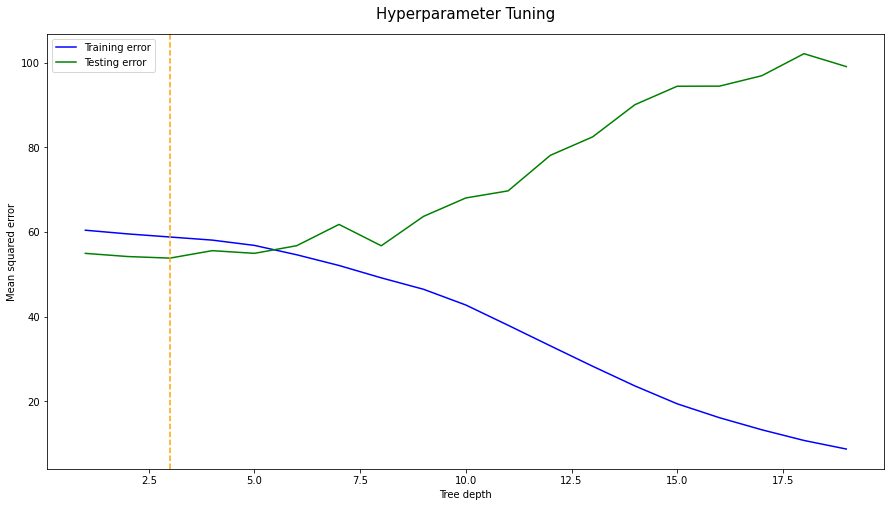

In [410]:
from sklearn.metrics import mean_squared_error as mse

max_depths = range(1, 20)
training_error = []
for max_depth in max_depths:
    model_1 = DecisionTreeRegressor(max_depth=max_depth)
    model_1.fit(X, y)
    training_error.append(mse(y, model_1.predict(X)))
    
testing_error = []
for max_depth in max_depths:
    model_2 = DecisionTreeRegressor(max_depth=max_depth)
    model_2.fit(x_train, y_train)
    testing_error.append(mse(y_test, model_2.predict(x_test)))

plt.plot(max_depths, training_error, color='blue', label='Training error')
plt.plot(max_depths, testing_error, color='green', label='Testing error')
plt.xlabel('Tree depth')
plt.axvline(x=3, color='orange', linestyle='--')
plt.ylabel('Mean squared error')
plt.title('Hyperparameter Tuning', pad=15, size=15)
plt.legend()
plt.savefig('error.png')

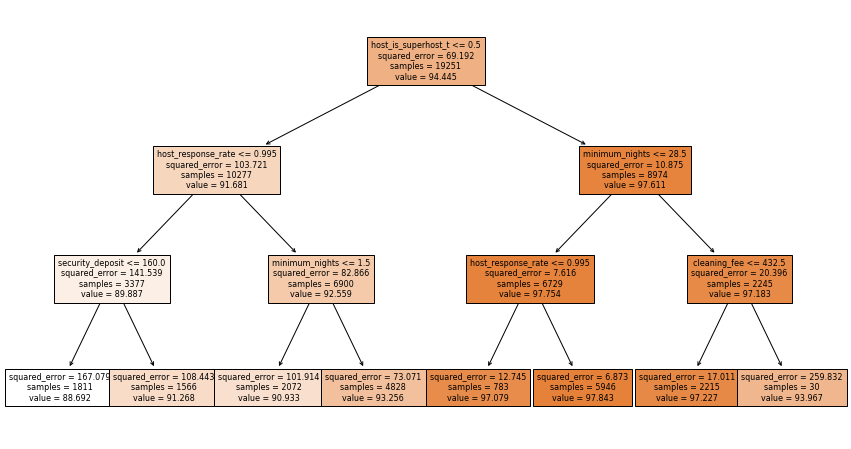

In [418]:
model2= regressor1.fit(x_test, y_test)
tree.plot_tree(regressor2, feature_names = x_test.columns,fontsize = 8, filled = True)
plt.show()

In [419]:
importance = model2.feature_importances_
feat_df = pd.DataFrame({'Feature':X.columns,'Importance':importance})
feat_df

,Feature,Importance
0,host_response_rate,0.107807
1,price,0.001447
2,security_deposit,0.038971
3,cleaning_fee,0.000000
4,guests_included,0.000000
5,extra_people,0.020662
6,minimum_nights,0.000000
7,reviews_per_month,0.035365
8,host_identity_verified_t,0.000000
9,host_is_superhost_t,0.795747


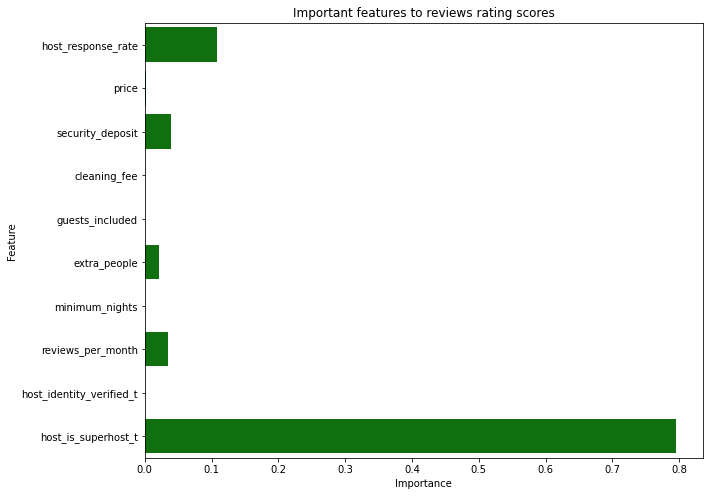

In [420]:
values = feat_df.Importance    
idx = feat_df.Feature
plt.figure(figsize=(10,8))
sns.barplot(y=idx,x=values,color='green').set(title='Important features to reviews rating scores')
plt.show()